In [1]:
# every code snippet with no source and not marked as AI generated is from the professors github repository

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

In [2]:
# https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

df = pd.read_csv('online_shoppers_intention.csv')

df.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [6]:
df = df.drop(df[df["VisitorType"] == "Other"].index)

df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Name: count, dtype: int64

In [7]:
df['Month'].value_counts()

Month
May     3364
Nov     2976
Mar     1907
Dec     1665
Oct      549
Sep      448
Aug      433
Jul      432
June     287
Feb      184
Name: count, dtype: int64

In [8]:
season_map = {
    "Dec": "Winter", "Jan": "Winter", "Feb": "Winter",
    "Mar": "Spring", "Apr": "Spring", "May": "Spring",
    "June": "Summer", "Jul": "Summer", "Aug": "Summer",
    "Sep": "Fall",   "Oct": "Fall",   "Nov": "Fall"
}

season_to_number = {
    "Winter": 1,    "Spring": 2, "Summer": 3, "Fall": 4
}


df['Month'] = df['Month'].map(season_map)


df['Month'] = df['Month'].map(season_to_number)

df.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,Returning_Visitor,True,False


In [9]:
df['TrafficType'].value_counts()

TrafficType
2     3902
1     2444
3     2045
4     1069
13     737
10     447
6      443
8      342
5      259
11     246
20     146
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

In [10]:
# There was just a short description of the variable TrafficType in the data documentation.
# It refers to the source the customer came from.
# Since there are 20 different values and no description, what value means what,
# I will invent 4 categories: social media (1-5), search engines (6-10), direct (11-15), others (16-20).
# I know that you would not invent data in real life, but in a real project, I would most certainly know, 
# what the values mean and it is very likely that I could group them in a similar way.



def map_traffic_type(x):
    if 1 <= x <= 5:
        return 1   # Social Media
    elif 6 <= x <= 10:
        return 2   # Search Engines
    elif 11 <= x <= 15:
        return 3   # Direct
    elif 16 <= x <= 20:
        return 4   # Others
    else:
        return 0

df['TrafficType'] = df['TrafficType'].apply(map_traffic_type) 



In [11]:
# The same applies to Region. I will invent 4 categories: North, Central, South


print(df['Region'].value_counts())

def map_region(x):
    if 1 <= x <= 3:
        return 1   # North
    elif 4 <= x <= 6:
        return 2   # Central
    elif 7 <= x <= 9:
        return 3   # South
    else:
        return 0

df['Region'] = df['Region'].apply(map_traffic_type) 

Region
1    4772
3    2395
4    1177
2    1131
6     804
7     759
9     456
8     433
5     318
Name: count, dtype: int64


In [12]:
df["Browser"].value_counts()

Browser
2     7940
1     2456
4      733
5      465
6      174
10     162
8      135
3      105
7       49
12      10
13       9
11       6
9        1
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder

variables_hot = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = hot_encoder.fit_transform(df[variables_hot]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables_hot)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

variables_label = ['VisitorType', 'Weekend']

df[variables_label] = df[variables_label].apply(label_encoder.fit_transform)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,1,0,1,0,0,0


In [15]:
corr_matrix = df.corr()['Revenue']
corr_matrix.sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.494959
Month_4                    0.166079
ProductRelated             0.158780
ProductRelated_Duration    0.152193
Administrative             0.138901
Informational              0.095666
Administrative_Duration    0.093537
Informational_Duration     0.070412
OperatingSystems_2         0.061424
TrafficType_2              0.037210
Weekend                    0.029871
TrafficType_4              0.020164
Browser_5                  0.015547
Browser_4                  0.014994
Browser_10                 0.013781
OperatingSystems_4         0.013000
Region_1                   0.011780
Browser_12                 0.011508
Browser_13                 0.005081
TrafficType_1              0.003516
OperatingSystems_5         0.000745
Browser_11                 0.000745
Browser_8                  0.000305
OperatingSystems_7        -0.000771
Browser_2                 -0.001810
Browser_9                 -0.003863
OperatingSystems_8        -0

In [16]:
df['Revenue'] = df['Revenue'].replace({
    True: '1: Revenue',
    False: '0: No_Revenue'
})

df['Revenue'].value_counts()

Revenue
0: No_Revenue    10353
1: Revenue        1892
Name: count, dtype: int64

In [17]:
X = df.drop('Revenue', axis=1)
y_temp = df['Revenue']

print(y_temp)

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)

print(le.classes_)

categories = list(le.classes_)



0        0: No_Revenue
1        0: No_Revenue
2        0: No_Revenue
3        0: No_Revenue
4        0: No_Revenue
             ...      
12325    0: No_Revenue
12326    0: No_Revenue
12327    0: No_Revenue
12328    0: No_Revenue
12329    0: No_Revenue
Name: Revenue, Length: 12245, dtype: object
['0: No_Revenue' '1: Revenue']


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format


df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
5,ProductRelated_Duration,869036.99
8,PageValues,167275.94
1,Administrative_Duration,41177.40
3,Informational_Duration,34869.34
4,ProductRelated,19224.61
0,Administrative,1125.93
2,Informational,358.97
15,Month_4,228.16
13,Month_2,96.24
18,OperatingSystems_3,47.37


In [19]:
# Based on the scores, it seems that browsers do not play a significant role so I will drop them
# The same applies to BounceRates and ExitRates



browser_colums = []

for col in df.columns:
    if 'Browser_' in col:
        browser_colums.append(df[col].name) 

X = X.drop(browser_colums, axis=1)

X = X.drop(['BounceRates', 'ExitRates'], axis=1)




In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [21]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 730 (2.85 KB)

 Trainable params: 674 (2.63 KB)

 Non-trainable params: 56 (224.00 B)

In [22]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8284 - loss: 4.2313 - val_accuracy: 0.8530 - val_loss: 1.1287
Epoch 2/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.4737 - val_accuracy: 0.8743 - val_loss: 0.3646
Epoch 3/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8784 - loss: 0.3490 - val_accuracy: 0.8819 - val_loss: 0.3444
Epoch 4/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8795 - loss: 0.3352 - val_accuracy: 0.8830 - val_loss: 0.3367
Epoch 5/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.3293 - val_accuracy: 0.8846 - val_loss: 0.3319
Epoch 6/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.3201 - val_accuracy: 0.8879 - val_loss: 0.3221
Epoch 7/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.3132 - val_accuracy: 0.8873 - val_loss: 0.3227
Epoch 8/300
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8838 - loss: 0.3151 - val_accu

<Axes: >

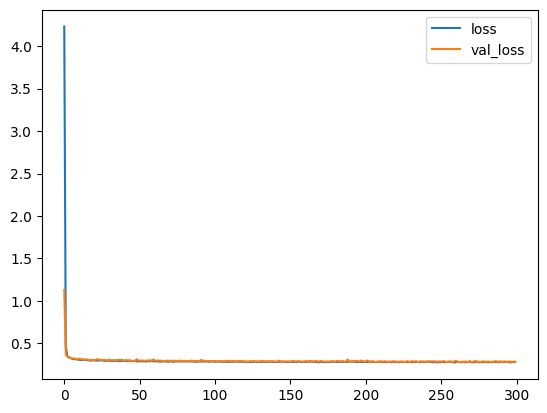

In [23]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

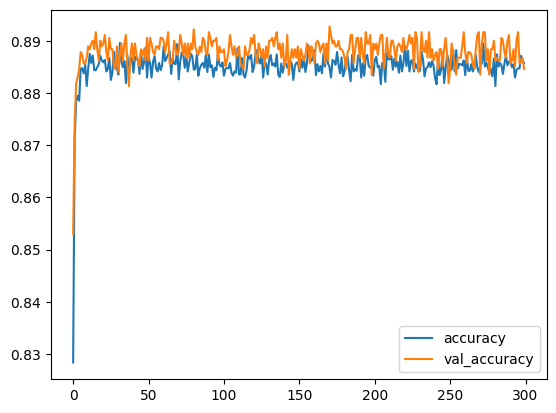

In [24]:
# there might be a little bit of overfitting since the accuracy is higher than the val_accuracy

loss_df[['accuracy', 'val_accuracy']].plot()

In [25]:
# The model guessed 0.89% of the data correctly in the test set and the train set
# which means my assumption before is wrong and there is no overfitting

print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.24531403183937073, 0.9145345687866211]

Train data evaluation:
[0.2670392394065857, 0.8889277577400208]


In [26]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

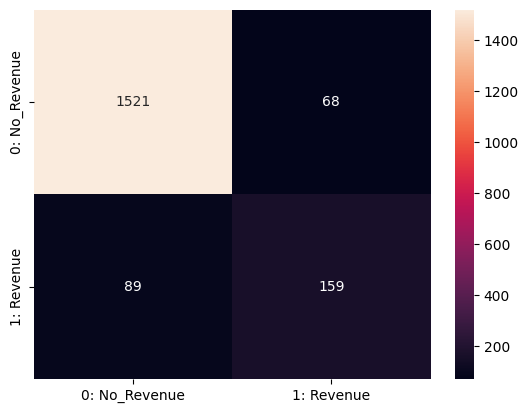

In [27]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [28]:
# The precision of No Revenue is very quite high (0.93). 
# But since the precision and recall of Revenue is not so high (0.68/0.63) and the fact that Revenue is probably the more interesting class,
# the model is not very usefull 


# the overall accuracy is 89% but since there are are 84% no_revenue cases (according to the data description), the number does not say too much and is only slightly
# better than guessing no_revenue all the time.
# the fact that the recall is just 0.52 is quite low since it means that almost half of the revenue cases are not detected.


print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

               precision    recall  f1-score   support

0: No_Revenue       0.94      0.96      0.95      1589
   1: Revenue       0.70      0.64      0.67       248

     accuracy                           0.91      1837
    macro avg       0.82      0.80      0.81      1837
 weighted avg       0.91      0.91      0.91      1837


Model overall accuracy: 91.45%


In [29]:
# the auc score is 0.91 so it is considered as excellent

roc_auc_score(y, model.predict(X), multi_class="ovr")

383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


0.9131691843464804